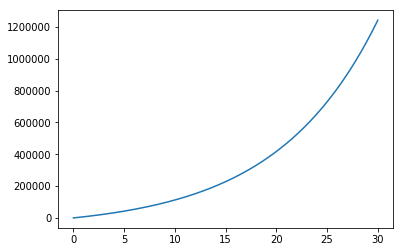

Balance after 30 years: $1,242,232.30


In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nYears = 30
monthsPerYear = 12

r = 0.10            # interest rate
Ps = 0              # starting principle
Pa = 545           # additional monthly principle

p = np.array([Ps])
for i in range(0, int(monthsPerYear*nYears)):
    Pm = (p[-1]+Pa)*(1+r/monthsPerYear)  # new calced principle
    p = np.append(p, Pm)                 # append to principle array


t = np.arange(0, p.shape[0])/monthsPerYear

plt.plot(t, p)
plt.show()

print("Balance after {} years: ${:,.2f}".format(nYears, p[-1]))

In [42]:
d = {'a': {'blah1': 1, 'blah2': 2, 'blah3': 3},
     'b': {'blah1': 1, 'blah2': 2, 'blah3': 3}}

for key in d:
    print(d[key]['blah1'])

1
1


In [48]:
for a in range(0, 8):
    print(a, (int(int(a) / 2)), int(a) % 2 )

0 0 0
1 0 1
2 1 0
3 1 1
4 2 0
5 2 1
6 3 0
7 3 1


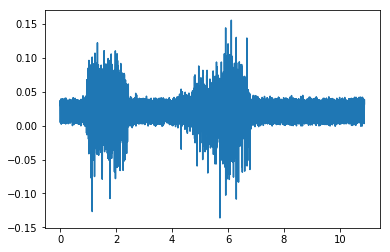

In [53]:
import os
import numpy as np
path = "/home/tannerbitz/Downloads/Yeonhun_EMG_Filtering"
os.chdir(path)

data = np.loadtxt('x1emg.txt')
plt.plot(data[:,0], data[:,1])
plt.show()

In [75]:
import numpy as np
n = 5
a = np.arange(0,n) * np.ones((3,n))

print(a)
print(np.mean(a, axis=1))

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
[2. 2. 2.]


In [65]:
a = np.random.normal(loc=0.0, scale=1, size=(n,n))

print(a)
print(np.abs(a))

[[-1.24609394 -2.22993674 -0.55139318 -0.07936771 -1.3483591 ]
 [-0.34556508 -1.56994842  0.66512381  0.77405697  0.53992735]
 [-0.9866183  -0.73340458  1.94528176 -0.40077303  2.96066424]
 [-0.5015989   0.07703847 -0.10147341 -0.12284447 -0.95971975]
 [ 0.85606418  1.83971875 -1.39728243  0.20844977  1.02728296]]
[[1.24609394 2.22993674 0.55139318 0.07936771 1.3483591 ]
 [0.34556508 1.56994842 0.66512381 0.77405697 0.53992735]
 [0.9866183  0.73340458 1.94528176 0.40077303 2.96066424]
 [0.5015989  0.07703847 0.10147341 0.12284447 0.95971975]
 [0.85606418 1.83971875 1.39728243 0.20844977 1.02728296]]


In [74]:
import time

a = np.zeros((16, 1000))
b = np.ones(16)
nRows, nCols = a.shape

t = []
for iCol in range(0, nCols):
    t1 = time.time()
    a[:,1:] = a[:,0:-1]
    a[:,0]  = b
    t.append(time.time()-t1)
    
print("Time for ops")
print("Avg: {}".format(np.mean(t)))
print("Std: {}".format(np.std(t)))
print("Most: {}".format(np.max(t)))
print("nOps in 1 cycle: {}".format((1/2000)/np.mean(t)))
print("Worse Case nOps in 1 cycle: {}".format((1/2000)/np.max(t)))

Time for ops
Avg: 1.679372787475586e-05
Std: 7.385344651916904e-06
Most: 0.00017213821411132812
nOps in 1 cycle: 29.773020244754253
Worse Case nOps in 1 cycle: 2.9046426592797783


In [113]:
import os
import numpy as np
import time
from scipy import signal
path = "/home/tannerbitz/Downloads/Yeonhun_EMG_Filtering"
os.chdir(path)

# high pass butterworth filter
Fs = 2000
n = 5
cutoff = 500
Fn = Fs/2
b,a = signal.butter(n, cutoff/Fn, 'high')
nCoeffs = len(a)

# load data
data = np.loadtxt('x1emg.txt')
y = data[:,1]
data = y*np.ones((16,len(y)))

# init data arrays
nReadingsPerSample = 16
dataLength = data.shape[1]
data_raw = np.zeros((nReadingsPerSample, dataLength))   # raw data
data_hpf = np.zeros((nReadingsPerSample, dataLength))   # data after its been high pass filtered
data_ma  = np.zeros((nReadingsPerSample, dataLength))   # 1/2 second moving avg of abs(_data_hpf)
data_ma_nohpf = np.zeros((nReadingsPerSample, dataLength))


def ApplyFilter(data_new):

    global data_raw, data_hpf, data_ma, data_ma_nohpf
    
    nReadings, nSamples = data_new.shape
    for iSample in range(0, nSamples):
        # shift data
        data_raw[:,1:] = data_raw[:,0:-1]
        data_hpf[:,1:] = data_hpf[:,0:-1]
        data_ma[:,1:]  = data_ma[:,0:-1]
        data_ma_nohpf[:,1:] = data_ma[:, 0:-1]

        # insert new data into _data_raw, then apply high pass filter
        data_raw[:,0] = data_new[:,iSample]
        data_hpf[:,0] = ( data_raw[:,0:nCoeffs].dot(b) -
                          data_hpf[:,1:nCoeffs].dot(a[1:]) )/a[0]
        data_ma[:,0] = np.mean(np.abs(data_hpf[:,0:int(Fs/6)]), axis=1)
        data_ma_nohpf[:,0] = np.mean(np.abs(data_raw[:,0:int(Fs/6)]), axis=1)

        
# time ApplyFilter
t = []
nRows, nCols = data.shape
for iCol in range(0, nCols):
    t1 = time.time()
    ApplyFilter(np.reshape(data[:,iCol], (16,1)))
    t.append(time.time() - t1)



In [89]:
np.mean(t)

0.0005131966271236509

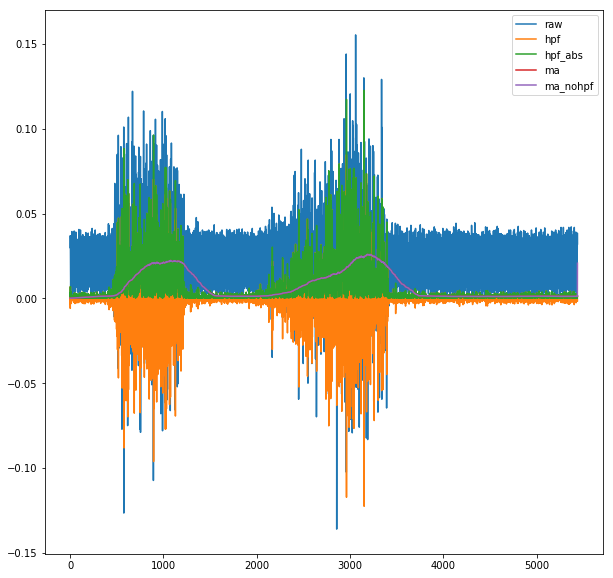

In [114]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
plt.plot(np.flip(data_raw[0,:]), label='raw')
plt.plot(np.flip(data_hpf[0,:]), label='hpf')
plt.plot(np.flip(np.abs(data_hpf[0,:])), label='hpf_abs')
plt.plot(np.flip(data_ma[0,:]), label='ma')
plt.plot(np.flip(data_ma_nohpf[0,:]), label='ma_nohpf')
plt.legend()
plt.show()

In [17]:
from collections import deque
import numpy as np
import time


q = deque([], 5000)
t = []
for i in range(0, 10000):
    a = np.ones(16)*i
    t1 = time.time()
    q.append(a)
    t.append(time.time() - t1)

t1 = time.time()
b = np.array(q)
print(time.time() - t1)
print(1/60)

0.0018427371978759766
0.016666666666666666


In [19]:
print("max: {}".format(np.max(t)))
print("mean: {}".format(np.mean(t)))

max: 3.266334533691406e-05
mean: 6.942987442016602e-07


In [22]:
a = np.zeros((16,5000))
# a = a.tolist()
q = deque(a, 5000)
q.append(np.ones(16))
print(q)

deque([array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])], maxlen=5000)


In [25]:
a = np.identity(4)
a[[0,2,3],:]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [30]:
a = np.reshape(np.arange(0,5), (5,1))
b = a * a.T
print(b)
print(b[0::2,0::2])

[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]
 [ 0  4  8 12 16]]
[[ 0  0  0]
 [ 0  4  8]
 [ 0  8 16]]
